In [15]:
!pip install pycaret
from pycaret.utils import enable_colab
import pandas as pd
enable_colab()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Colab mode enabled.


In [16]:
from pycaret.classification import *

In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
dataset= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/netflix.csv')

In [39]:
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...
547,s548,TV Show,We the People,NaN,"H.E.R., Adam Lambert, Cordae, Kristen Anderson...",United States,4-Jul-21,2021,TV-Y7,1 Season
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,3-Jul-21,2020,TV-14,17 Seasons
549,s550,TV Show,Big Timber,NaN,NaN,NaN,2-Jul-21,2020,TV-14,1 Season
550,s551,Movie,Fear Street Part 1: 1994,Leigh Janiak,"Kiana Madeira, Olivia Scott Welch, Benjamin Fl...",NaN,2-Jul-21,2021,R,107 min


In [40]:
dataset.shape

(552, 10)

In [41]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (497, 10)
Unseen Data For Predictions: (55, 10)


In [43]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'type', session_id=123,use_gpu = True) 

,Description,Value
0,session_id,123
1,Target,type
2,Target Type,Binary
3,Label Encoded,"Movie: 0, TV Show: 1"
4,Original Data,"(497, 10)"
5,Missing Values,True
6,Numeric Features,1
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [44]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9942,0.0000,0.9846,1.0000,0.9920,0.9875,0.9878,0.036
dt,Decision Tree Classifier,0.9913,0.9900,0.9846,0.9929,0.9880,0.9811,0.9820,0.022
rf,Random Forest Classifier,0.9913,1.0000,0.9846,0.9929,0.9880,0.9811,0.9820,0.977
ada,Ada Boost Classifier,0.9913,0.9913,0.9846,0.9929,0.9880,0.9811,0.9820,0.230
gbc,Gradient Boosting Classifier,0.9913,0.9918,0.9846,0.9929,0.9880,0.9811,0.9820,0.199
et,Extra Trees Classifier,0.9913,0.9996,0.9846,0.9929,0.9880,0.9811,0.9820,0.991
lr,Logistic Regression,0.9884,1.0000,0.9769,0.9929,0.9840,0.9749,0.9760,0.102
lightgbm,Light Gradient Boosting Machine,0.9884,0.9974,0.9769,0.9929,0.9840,0.9749,0.9760,0.066
lda,Linear Discriminant Analysis,0.9712,0.9784,0.9609,0.9625,0.9609,0.9381,0.9391,0.112
nb,Naive Bayes,0.9455,0.9551,0.9923,0.8822,0.9326,0.8875,0.8937,0.020


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


In [45]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9714,0.9773,1.0000,0.9286,0.9630,0.9398,0.9415
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [46]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [47]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9714,0.9965,0.9231,1.0000,0.9600,0.9378,0.9397
1,0.9143,0.9860,0.7692,1.0000,0.8696,0.8073,0.8228
2,0.9714,0.9983,1.0000,0.9286,0.9630,0.9398,0.9415
3,0.9429,0.9790,0.8462,1.0000,0.9167,0.8736,0.8807
4,0.9429,0.9353,0.8462,1.0000,0.9167,0.8736,0.8807
5,0.7714,0.8252,0.6154,0.7273,0.6667,0.4946,0.4986
6,0.9143,0.9633,0.7692,1.0000,0.8696,0.8073,0.8228
7,0.9118,0.9621,0.9167,0.8462,0.8800,0.8104,0.8120
8,0.9706,0.9697,0.9167,1.0000,0.9565,0.9344,0.9364


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [48]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9714,1.0,0.9231,1.0000,0.9600,0.9378,0.9397
1,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9714,1.0,1.0000,0.9286,0.9630,0.9398,0.9415
7,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [49]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9714,0.9773,1.0000,0.9286,0.9630,0.9398,0.9415
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [50]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [51]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9143,0.8706,0.7692,1.0000,0.8696,0.8073,0.8228
2,0.9714,1.0000,1.0000,0.9286,0.9630,0.9398,0.9415
3,0.9429,0.9790,0.8462,1.0000,0.9167,0.8736,0.8807
4,0.8857,0.9371,0.6923,1.0000,0.8182,0.7388,0.7654
5,0.8857,0.9213,0.6923,1.0000,0.8182,0.7388,0.7654
6,0.8857,0.9388,0.7692,0.9091,0.8333,0.7473,0.7533
7,0.9706,0.9716,0.9167,1.0000,0.9565,0.9344,0.9364
8,0.9412,0.9261,0.9167,0.9167,0.9167,0.8712,0.8712


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [52]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9714,1.0,1.0000,0.9286,0.9630,0.9398,0.9415
7,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


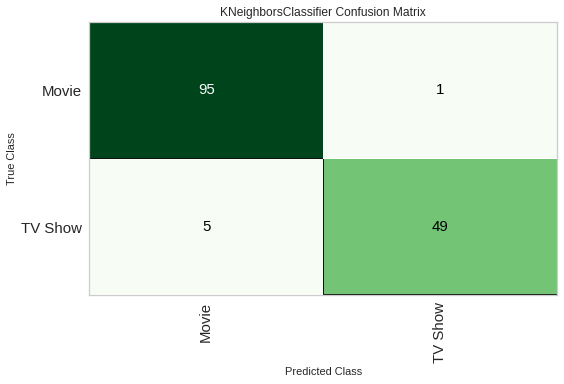

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [53]:
plot_model(tuned_knn, plot = 'confusion_matrix')

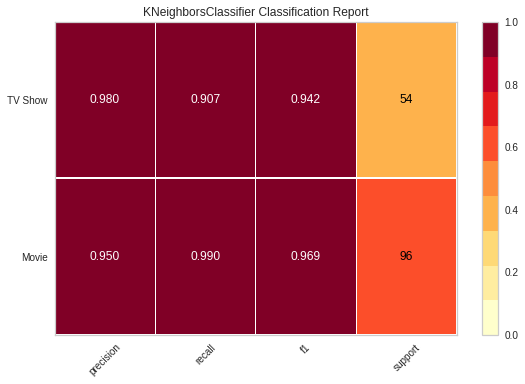

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [54]:
plot_model(tuned_knn, plot = 'class_report')

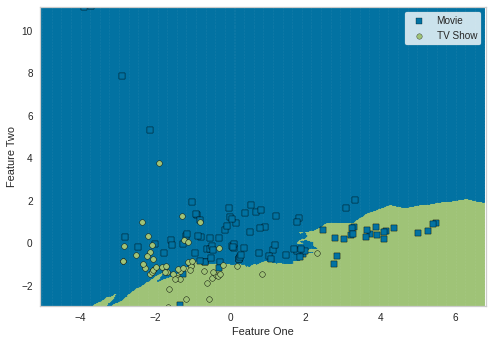

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [55]:
plot_model(tuned_knn, plot='boundary')


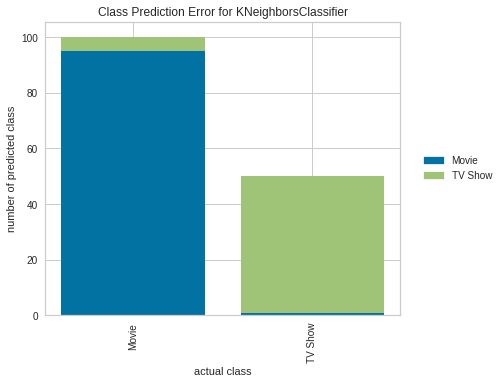

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [56]:
plot_model(tuned_knn, plot = 'error')


In [57]:
evaluate_model(tuned_knn)


INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [58]:
predict_model(tuned_knn);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.96,0.9862,0.9074,0.98,0.9423,0.9118,0.9133


In [59]:
final_knn = finalize_model(tuned_knn)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom

In [60]:
print(final_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform')


In [61]:
unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0,0.9866,0,0,0,0,0


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Label,Score
0,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,TV Show,0.9412
1,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,24-Sep-21,2021,TV-MA,1 Season,TV Show,0.8235
2,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,22-Sep-21,2020,TV-MA,2 Seasons,TV Show,0.7647
3,s26,TV Show,Love on the Spectrum,NaN,Brooke Satchwell,Australia,21-Sep-21,2021,TV-14,2 Seasons,TV Show,0.6471
4,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan",16-Sep-21,2012,R,115 min,Movie,0.8235


In [62]:
save_model(final_knn,'Final KNN Model 08Feb2020')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=17, p=2,
                     weights='uniform'), model_name=Final KNN Model 08Feb2020, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='type',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                 ('fix_perfect', Remove_100(target='type')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
           

In [63]:
saved_final_knn = load_model('Final KNN Model 08Feb2020')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final KNN Model 08Feb2020, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [64]:
new_prediction = predict_model(saved_final_knn, data=data_unseen)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='type',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strateg...
                ('fix_perfect', Remove_100(target='type')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('d

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0,0.9866,0,0,0,0,0


In [65]:
new_prediction.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Label,Score
0,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,TV Show,0.9412
1,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,24-Sep-21,2021,TV-MA,1 Season,TV Show,0.8235
2,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,22-Sep-21,2020,TV-MA,2 Seasons,TV Show,0.7647
3,s26,TV Show,Love on the Spectrum,NaN,Brooke Satchwell,Australia,21-Sep-21,2021,TV-14,2 Seasons,TV Show,0.6471
4,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan",16-Sep-21,2012,R,115 min,Movie,0.8235
